In [46]:
import pandas as pd
colnames = ["age", "workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income<=50k"]
df =  pd.read_csv('adult.data',sep = ",",names = colnames)
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income<=50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Description of fnlwgt (final weight)

The weights on the CPS files are controlled to independent estimates of the
civilian noninstitutional population of the US.  These are prepared monthly
for us by Population Division here at the Census Bureau.  We use 3 sets of
controls.
These are:\
\
          1.  A single cell estimate of the population 16+ for each state.\
         2.  Controls for Hispanic Origin by age and sex.\
         3.  Controls by Race, age and sex.\
         \
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.

In [14]:
df.isna().sum()

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [19]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [47]:
import seaborn as sns
cross_tab = pd.crosstab(index=df['race'],
                             columns=df['income<=50k'])
cross_tab

cross_tab_prop = pd.crosstab(index=df['race'],
                             columns=df['income<=50k'],
                             normalize="index")
cross_tab_prop

income<=50k,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.884244,0.115756
Asian-Pac-Islander,0.734360,0.265640
Black,0.876120,0.123880
Other,0.907749,0.092251
White,0.744140,0.255860


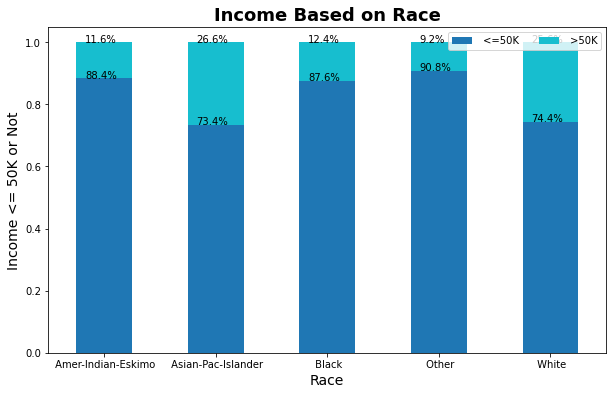

In [48]:
import matplotlib.pyplot as plt
import numpy as np
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Race",fontsize=14)
plt.ylabel("Income <= 50K or Not",fontsize=14)
plt.xticks(rotation=0)
plt.title("Income Based on Race",fontsize=18,
                 fontweight="bold")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=10)

plt.show()


In [49]:
cross_tab2 = pd.crosstab(index=df['sex'],
                             columns=df['income<=50k'])
cross_tab2

cross_tab_prop2 = pd.crosstab(index=df['sex'],
                             columns=df['income<=50k'],
                             normalize="index")
cross_tab_prop2

income<=50k,<=50K,>50K
sex,,
Female,0.890539,0.109461
Male,0.694263,0.305737


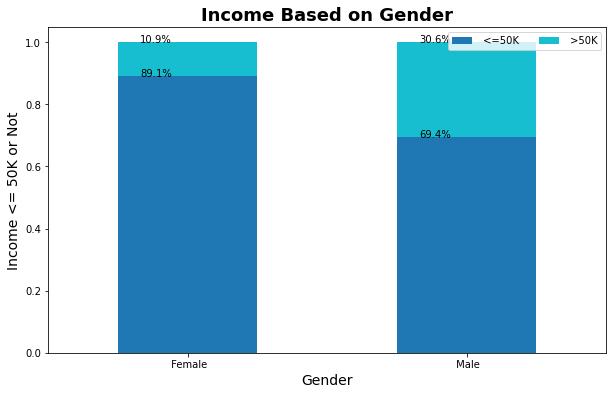

In [50]:
cross_tab_prop2.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Income <= 50K or Not",fontsize=14)
plt.xticks(rotation=0)
plt.title("Income Based on Gender",fontsize=18,
                 fontweight="bold")


for n, x in enumerate([*cross_tab2.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop2.loc[x],
                                   cross_tab_prop2.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=10)

plt.show()
